<a href="https://colab.research.google.com/github/Mario-RJunior/calculadora-imoveis/blob/master/analise_exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1) Importando os dados

In [61]:
# Importanto as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
# Recuperando o link da base de dados gerada no estudo de web scraping
LINK = 'https://raw.githubusercontent.com/Mario-RJunior/web-scraping-ML/master/dados_imoveis.csv'

In [3]:
# Gerando o dataframe
df = pd.read_csv(LINK)
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,zona,quartos,area,preco
0,norte,2.0,90,990.000
1,norte,2.0,55,1.600
2,norte,3.0,136,4.500
3,norte,2.0,51,1.326
4,norte,1.0,28,900.000


In [4]:
# Verificando dados estatísticos
df.describe()

,quartos,area,preco
count,1342.000000,1344.000000,1344.000000
mean,1.895678,83.278274,59.439588
std,0.773052,204.359982,209.995727
min,1.000000,8.000000,1.000000
25%,1.000000,45.000000,1.500000
50%,2.000000,60.000000,2.080000
75%,2.000000,82.000000,3.250000
max,5.000000,7000.000000,990.000000


In [5]:
# Verificando valores nulos
df.isna().sum()

zona       0
quartos    2
area       0
preco      0
dtype: int64

In [6]:
# Verificando os tipos das variáveis
df.dtypes

zona        object
quartos    float64
area         int64
preco      float64
dtype: object

In [7]:
# Verificando a correlação
df.corr()

,quartos,area,preco
quartos,1.000000,0.208945,-0.248522
area,0.208945,1.000000,-0.049144
preco,-0.248522,-0.049144,1.000000


## 2) Análise Exploratória dos Dados e Preprocessamento

Podemos agora fazer alguns gráficos para entendermos os dados. Para isso, iremos separar a base de dados entre base de treino e de teste e por fim cumprir as etapas de preprocessamentos em cada uma separadamente.

In [68]:
# Divisão da base entre treino e teste
treino, teste = train_test_split(df, 
                                 stratify=df['zona'], 
                                 test_size=0.25, 
                                 random_state=0)

In [71]:
print(f'Base de treino {treino.shape} \nBase de teste: {teste.shape}')

Base de treino (1008, 4) 
Base de teste: (336, 4)


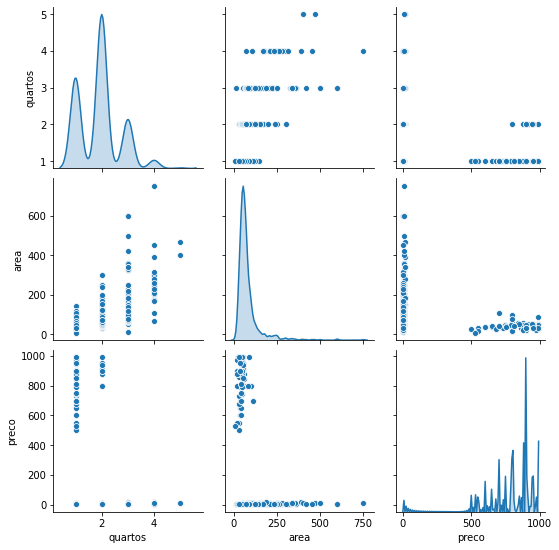

In [73]:
# Distplot com os dados originais
sns.pairplot(data=treino, diag_kind='kde')
plt.show()

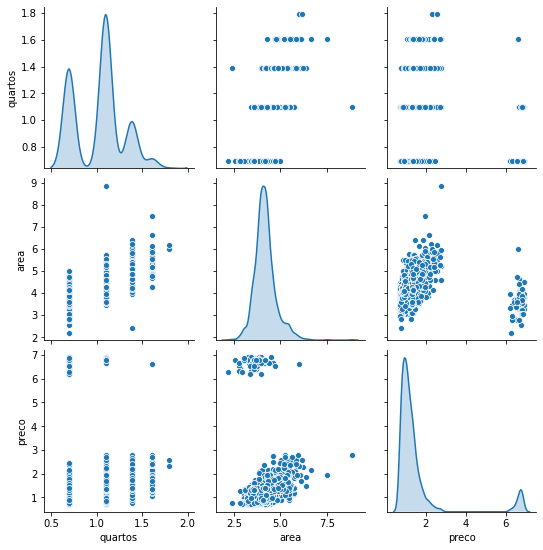

In [14]:
# Distplot com os dados em escala logarítmica
colunas = df[['quartos', 'area', 'preco']]
sns.pairplot(data=np.log1p(colunas), diag_kind='kde')
plt.show()

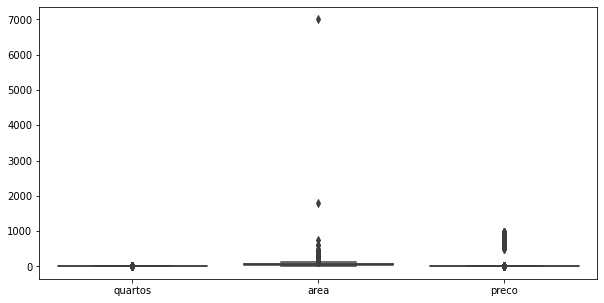

In [10]:
# Boxplot com os dados originais
fig = plt.figure(figsize=(10,5))
colunas = df[['quartos', 'area', 'preco']]
sns.boxplot(data=colunas)
plt.show()

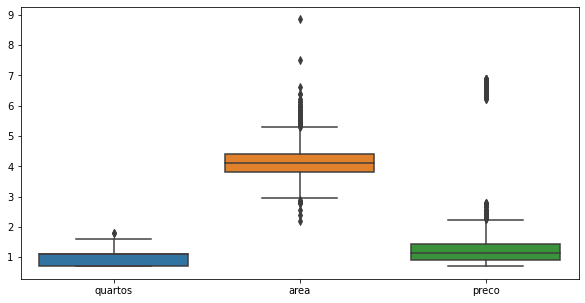

In [17]:
# Boxplot com os dados em escala logarítmica
fig = plt.figure(figsize=(10,5))
colunas = df[['quartos', 'area', 'preco']]
sns.boxplot(data=np.log1p(colunas))
plt.show()

- Tratamento de valores missing

Trataremos o caso de valores missing na coluna quartos preenchendo o respectivo valor pela mediana.

In [11]:
# Na coluna quartos

# Zona Norte
df.query('zona == "norte"').isnull().sum()
mediana_z = df.query('zona == "norte"')['quartos'].median()

# Zona Leste
df.query('zona == "leste"').isnull().sum()
mediana_l = df.query('zona == "leste"')['quartos'].median()

print(f'Mediana para zona Norte: {mediana_z}. \nMediana para zona Leste: {mediana_l}.')

Mediana para zona Norte: 2.0. 
Mediana para zona Leste: 2.0.


In [12]:
df = df.fillna(df.median())